# Processo Seletivo UFRJ Analytica 

### Analise de dados Covid 19 

Contém um grande número de informações anônimas relacionadas ao paciente, incluindo pré-condições. O conjunto de dados brutos consiste em 21 características diferentes e 1.048.576 pacientes únicos. Nos recursos booleanos, 1 significa "sim" e 2 significa "não". valores como 97 e 99 são dados ausentes.

- sexo: 1 para feminino e 2 para masculino.
- idade: do paciente.
- classificação: resultados de testes ambiciosos. Os valores 1-3 significam que o paciente foi diagnosticado com covid em    diferentes graus. 4 ou superior significa que o paciente não é portador de covid ou que o teste é inconclusivo.
- tipo de paciente: tipo de atendimento que o paciente recebeu na unidade. 1 para regresso a casa e 2 para internamento.
- pneumonia: se o paciente já tem inflamação dos sacos aéreos ou não.
- gravidez: se a paciente está grávida ou não.
- diabetes: se o paciente tem diabetes ou não.
- DPOC: Indica se o paciente tem doença pulmonar obstrutiva crônica ou não.
- asma: se o paciente tem asma ou não.
- inmsupr: se o paciente é imunossuprimido ou não.
- hipertensão: se o paciente tem hipertensão ou não.
- cardiovascular: se o paciente tem doença relacionada ao coração ou aos vasos sanguíneos.
- renal crônica: se o paciente tem doença renal crônica ou não.
- outra doença: se o paciente tem outra doença ou não.
- obesidade: se o paciente é obeso ou não.
- tabaco: se o paciente é tabagista.
- usmr: Indica se o paciente tratou unidades médicas de primeiro, segundo ou terceiro nível.
- unidade médica: tipo de instituição do Sistema Único de Saúde que prestou o atendimento.
- entubado: se o paciente estava conectado ao ventilador.
- icu: Indica se o paciente foi internado em uma Unidade de Terapia Intensiva.
- Data do falecimento: Se o paciente faleceu indicar a data do falecimento, caso contrário 9999-99-99.
- link [https://www.kaggle.com/datasets/meirnizri/covid19-dataset]

## 1) Importando as bibliotecas e os arquivos para analise:

In [1]:
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np

In [2]:
pasta='C:\\Users\\wesle\\Projetos_Estudo_Analise-de-Dados\\Notebooks\\Analise_Covid19'
dados_covid19 = os.path.join(pasta, 'Covid_Data.zip')

In [3]:
with ZipFile(dados_covid19) as z:
    with z.open(f'CovidData.csv') as f:
        df = pd.read_csv(f,sep=',')

## 2) Tratamento dos dados:

In [4]:
df.head(1)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97


In [5]:
df.columns = [col.lower() for col in df.columns]

In [6]:
df.pregnant = df.pregnant.replace(97, 2)
df.drop(['intubed', 'icu'], axis=1, inplace=True)

In [7]:
# Contando os valores ausentes 
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

pneumonia
0
0
16003

age
135
124
86

pregnant
0
3754
0

diabetes
0
3338
0

copd
0
3003
0

asthma
0
2979
0

inmsupr
0
3404
0

hipertension
0
3104
0

other_disease
0
5045
0

cardiovascular
0
3076
0

obesity
0
3032
0

renal_chronic
0
3006
0

tobacco
0
3220
0

clasiffication_final
0
0
0



In [8]:
df.drop(df.index[df.pneumonia == 99], axis=0, inplace=True)
df.drop(df.index[df.pregnant == 98], axis=0, inplace=True)
df.drop(df.index[df.copd == 98], axis=0, inplace=True)
df.drop(df.index[df.diabetes == 98], axis=0, inplace=True)
df.drop(df.index[df.asthma == 98], axis=0, inplace=True)
df.drop(df.index[df.inmsupr == 98], axis=0, inplace=True)
df.drop(df.index[df.other_disease == 98], axis=0, inplace=True)
df.drop(df.index[df.cardiovascular == 98], axis=0, inplace=True)
df.drop(df.index[df.obesity == 98], axis=0, inplace=True)
df.drop(df.index[df.renal_chronic == 98], axis=0, inplace=True)
df.drop(df.index[df.tobacco == 98], axis=0, inplace=True)

In [9]:
df["died"] = [2 if x == "9999-99-99" else 1 for x in df["date_died"]]

## 3) Analise Exploratória dos dados Tratados:

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sn

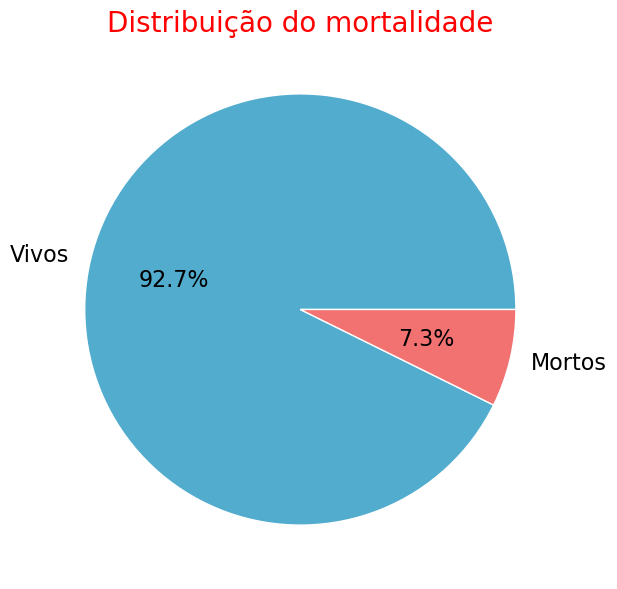

In [11]:
# Distribuição de Mortalidade 
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    df.died.value_counts().values, labels=['Vivos', 'Mortos'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['#51ACCE', '#F27272']
)
ax.set_title('Distribuição do mortalidade', fontsize=20, color='red')
plt.show()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


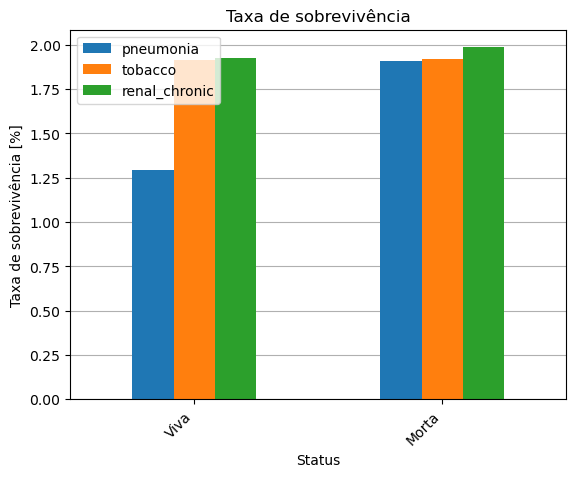

In [47]:
# Taxa de Sobrevivencia de pessoas com problemas prévios respiratórios 
ax = df.groupby(by=['died'])['pneumonia','tobacco', 'renal_chronic']\
    .mean()\
    .multiply(1)\
    .plot.bar(title='Taxa de sobrevivência')
    
plt.ylabel('Taxa de sobrevivência [%]')
plt.xlabel('Status')
plt.xticks([0,1],['Viva','Morta'], rotation= 45, ha='right')
ax.set_axisbelow(True)
plt.grid(axis='y')

x_offset = -.1
y_offset = 0.9

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)
    
ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

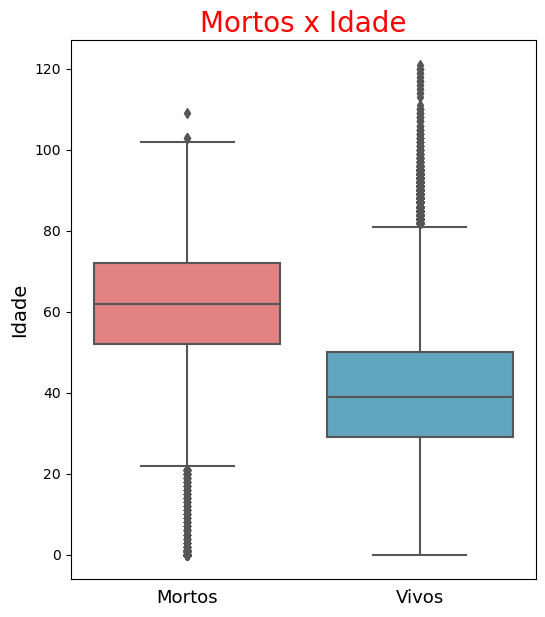

In [15]:
# Analise comparativa dos mortos por idade 
plt.figure(figsize=(6, 7))
sn.boxplot(data=df, x='died', y='age', palette=sn.color_palette(['#F27272', '#51ACCE']))
plt.title('Mortos x Idade', color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('Idade', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Mortos', 'Vivos'], fontsize=13);

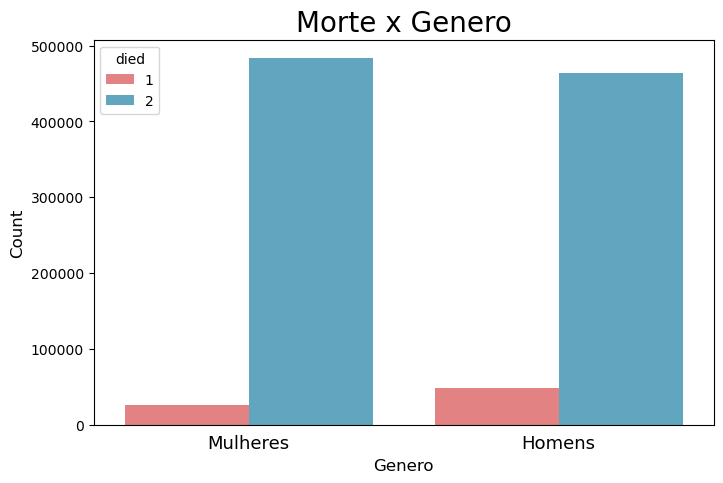

In [45]:
plt.figure(figsize=(8, 5))
sn.countplot(data=df, x='sex', hue='died', palette=sn.color_palette(['#F27272', '#51ACCE']))
plt.title('Morte x Genero', fontsize=20, color='black')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genero', fontsize=12)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Mulheres', 'Homens'], fontsize=13);

In [17]:
analisys_date = df.drop(df.index[df.date_died == '9999-99-99'])

In [18]:
analisys_date['date_died'] = pd.to_datetime(analisys_date['date_died'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/05/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/07/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/02/2020' in DD/MM/YYYY format. Provide format or specif

Text(0.5, 1.0, 'Morto x Ano')

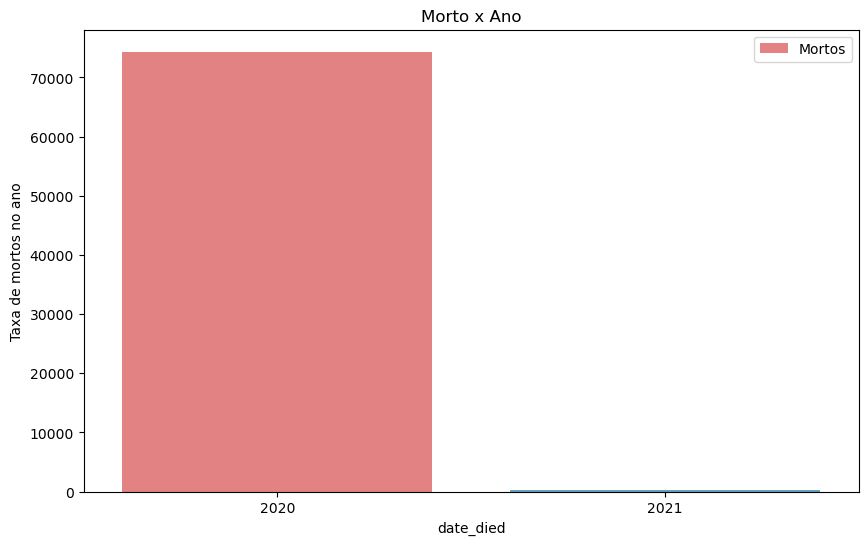

In [46]:
plt.figure(figsize=(10, 6))
plot_abaixo_sm = sn.barplot(x = analisys_date.date_died.dt.year,
                            y ='died',
                             data=analisys_date,
                              estimator=np.sum, ci=None, palette=['#F27272', '#51ACCE'])
plt.legend(["Mortos"])
plt.ylabel("Taxa de mortos no ano")
plt.title("Morto x Ano")

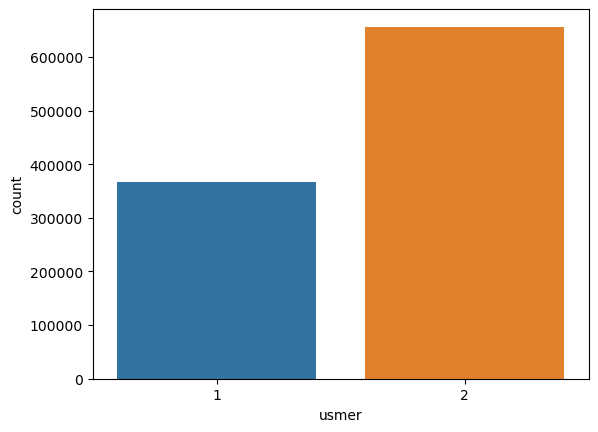

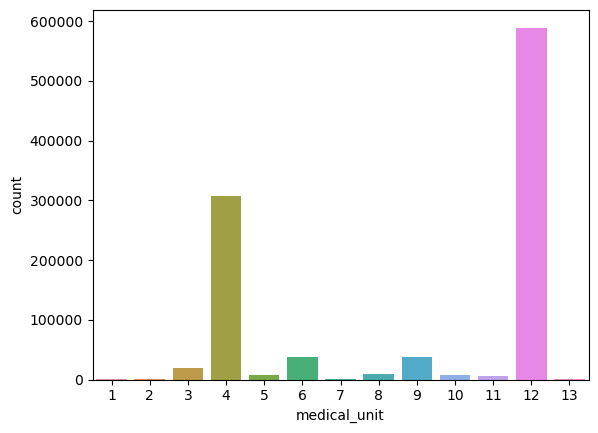

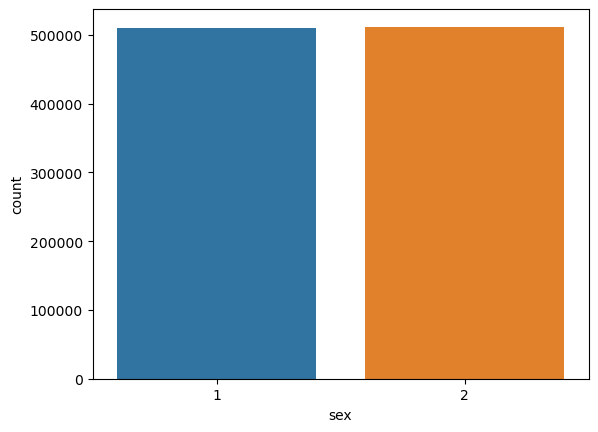

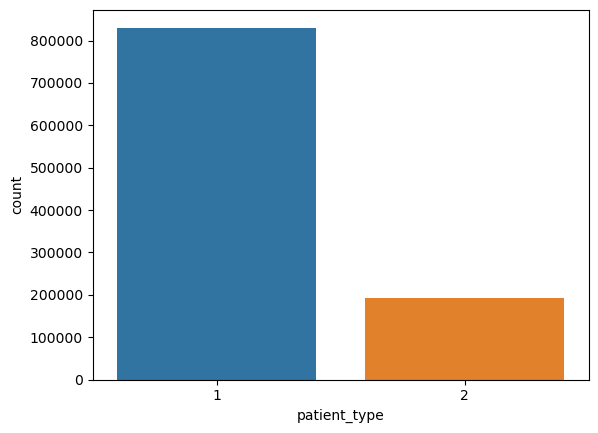

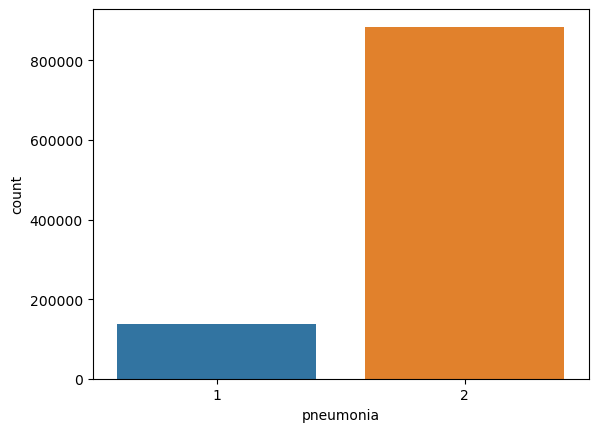

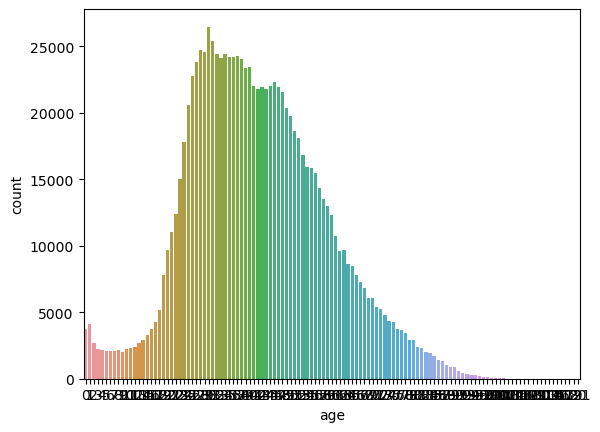

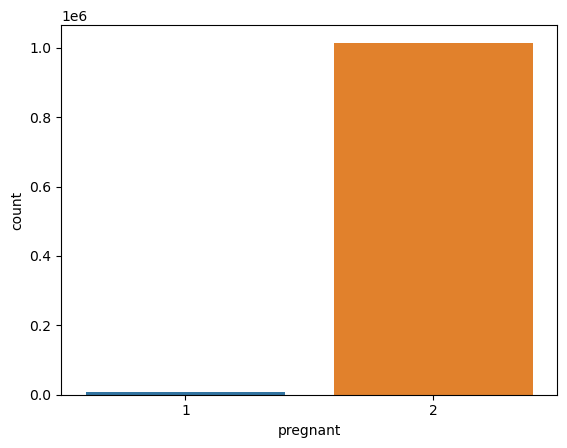

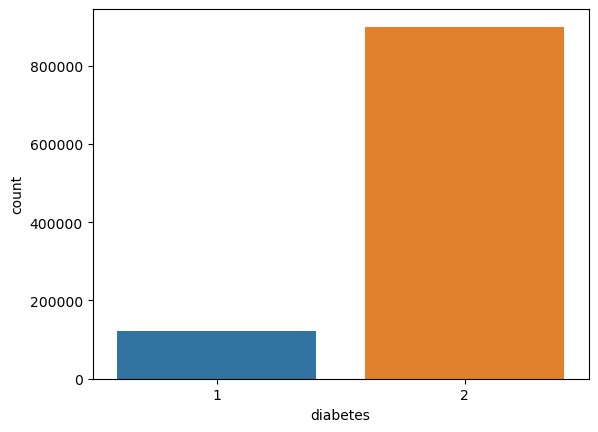

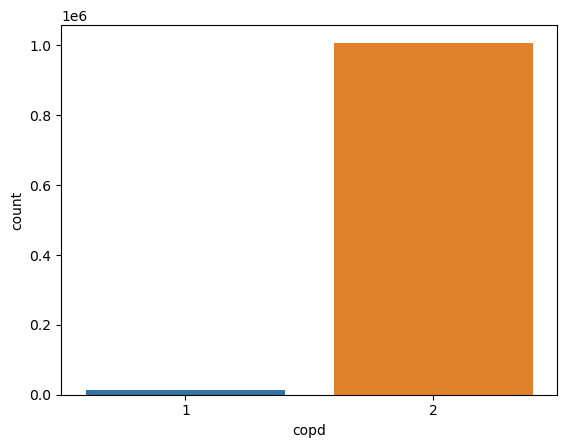

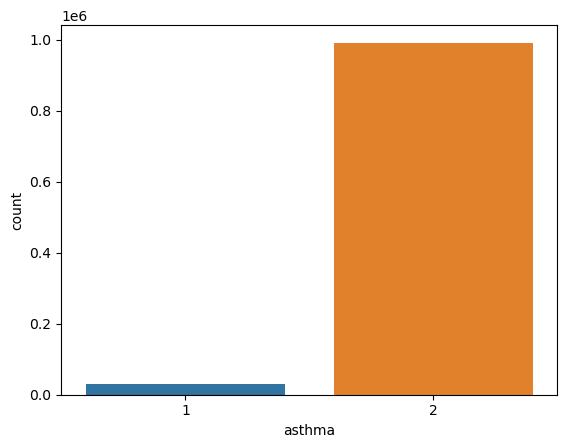

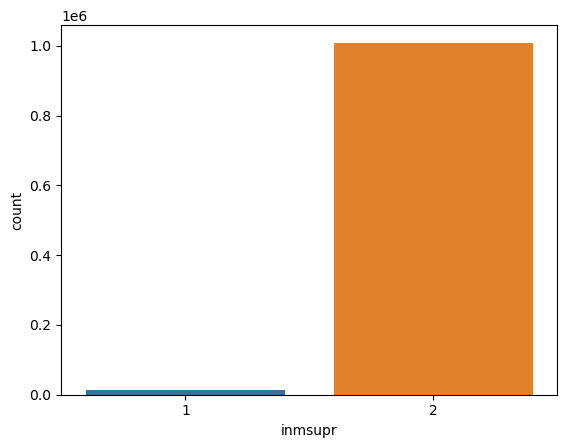

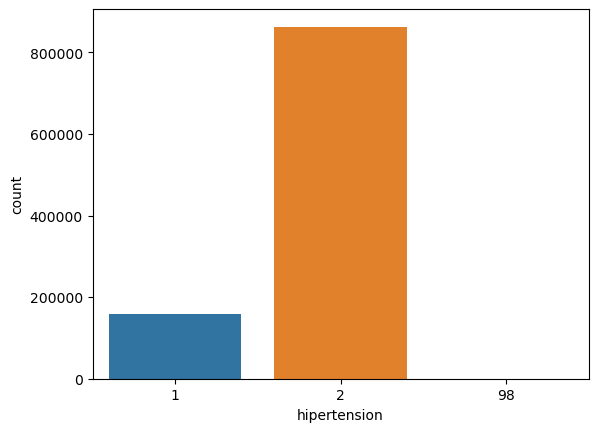

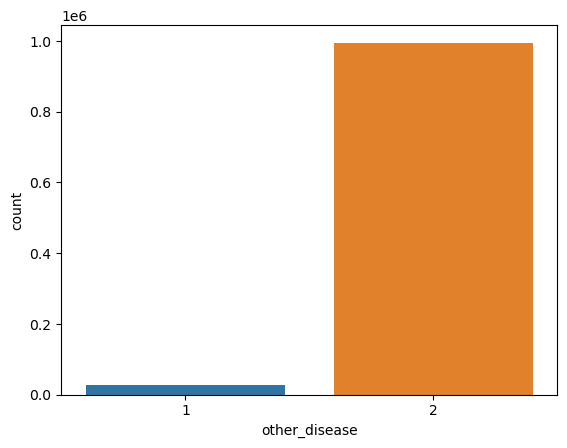

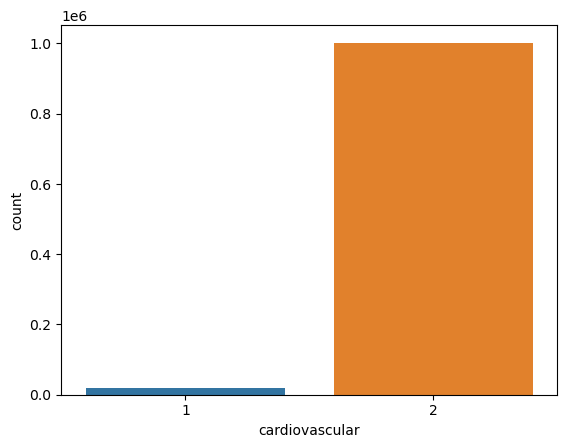

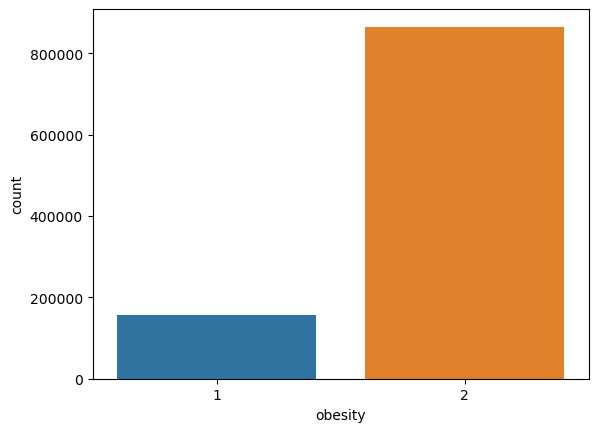

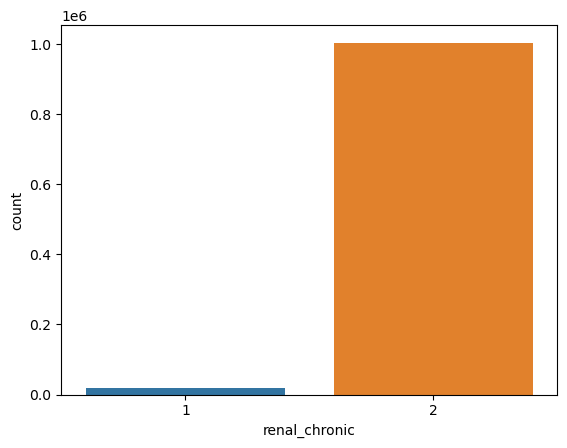

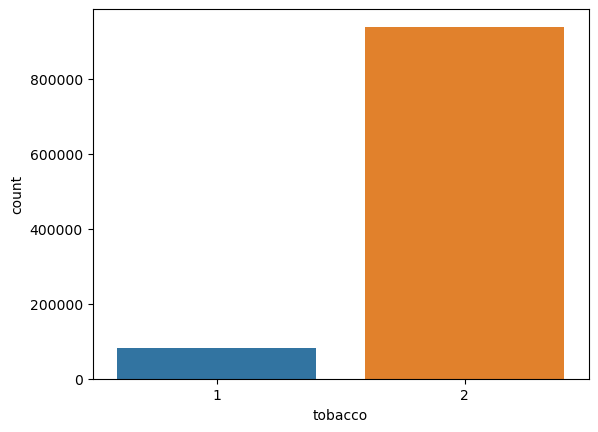

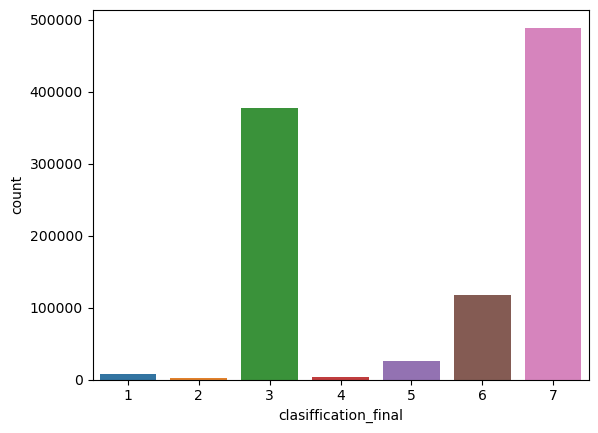

In [13]:
for i in df.loc[:, ~df.columns.isin(["died", 'date_died'])]:
    f = sn.countplot(x=df[i]);
    plt.show()

## 4) Modelagem de Machine Learning 

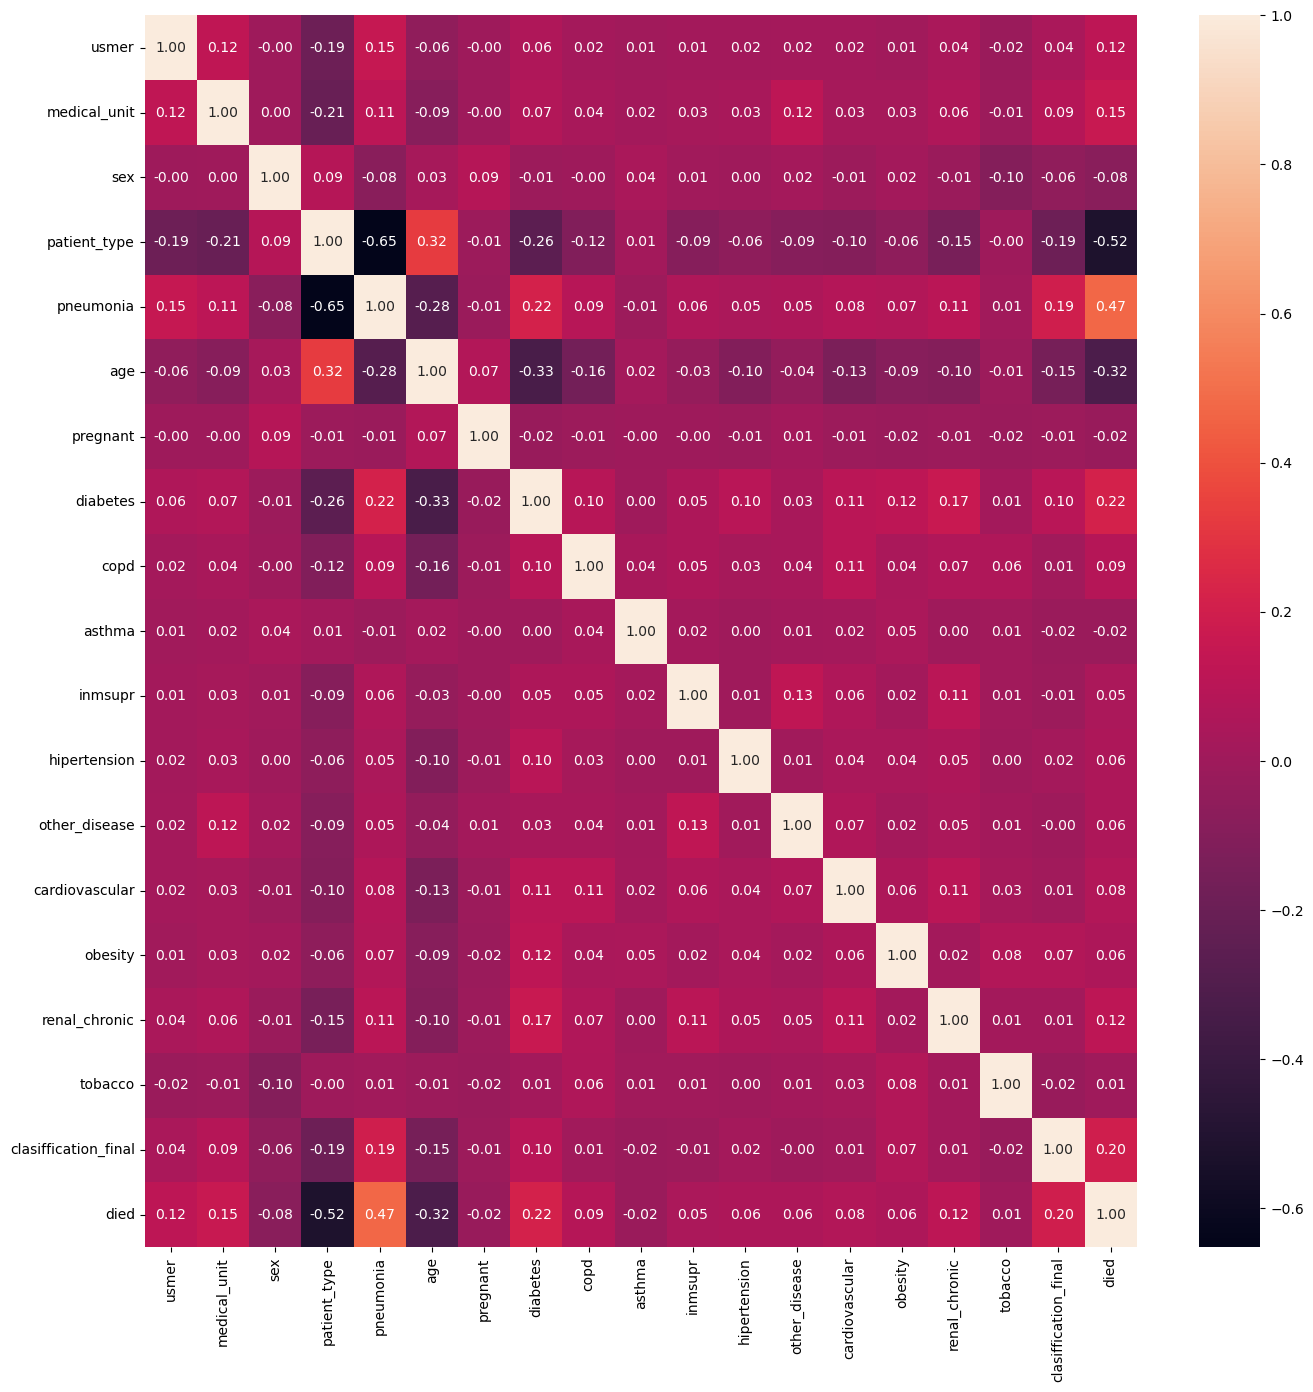

In [20]:
## Entendendo os principais fatores que contribuem 
plt.figure(figsize=(16,16))
sn.heatmap(data=df.corr(), annot=True, fmt=".2f");

In [21]:
# Indicando as variáveis “x” e “y” estamos dizendo que queremos separar estas duas variáveis em dois grupos, sendo que com o parâmetro “test_size = 0.3” 
# determinamos que os dados de teste receberão 30% dos dados, e os dados de treino 70%. Como estamos dividindo duas bases
# como resultado teremos quatro bases, sendo que cada uma será salva na respectiva variável.

from sklearn.model_selection import train_test_split

# Criamos então a variável “y” com os dados da coluna “target”, ou seja, os dados que iremos prever. Criamos também a variável “x” com as demais colunas do dataset, que são as variáveis preditoras.

x = df.drop("died", axis = 1)
y = df['died']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

print(x_train.shape, 
      x_test.shape, 
      y_train.shape,
      y_test.shape)

(613293, 19) (408862, 19) (613293,) (408862,)


In [24]:
df_train = pd.concat([x_train, y_train], axis=1)
print(df_train.shape)
df_train.head()

(613293, 20)


,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
651323,2,12,2,1,9999-99-99,2,30,2,2,2,2,2,2,2,2,2,2,2,3,2
271021,2,4,2,2,9999-99-99,2,72,2,2,2,2,2,2,1,2,2,2,2,7,2
532192,2,12,1,1,9999-99-99,2,22,2,1,2,2,2,2,2,2,2,2,2,3,2
746289,1,12,1,1,9999-99-99,2,56,2,2,2,2,2,1,2,2,1,2,2,7,2
638175,2,12,2,2,9999-99-99,2,40,2,1,2,2,2,2,2,2,2,2,2,3,2


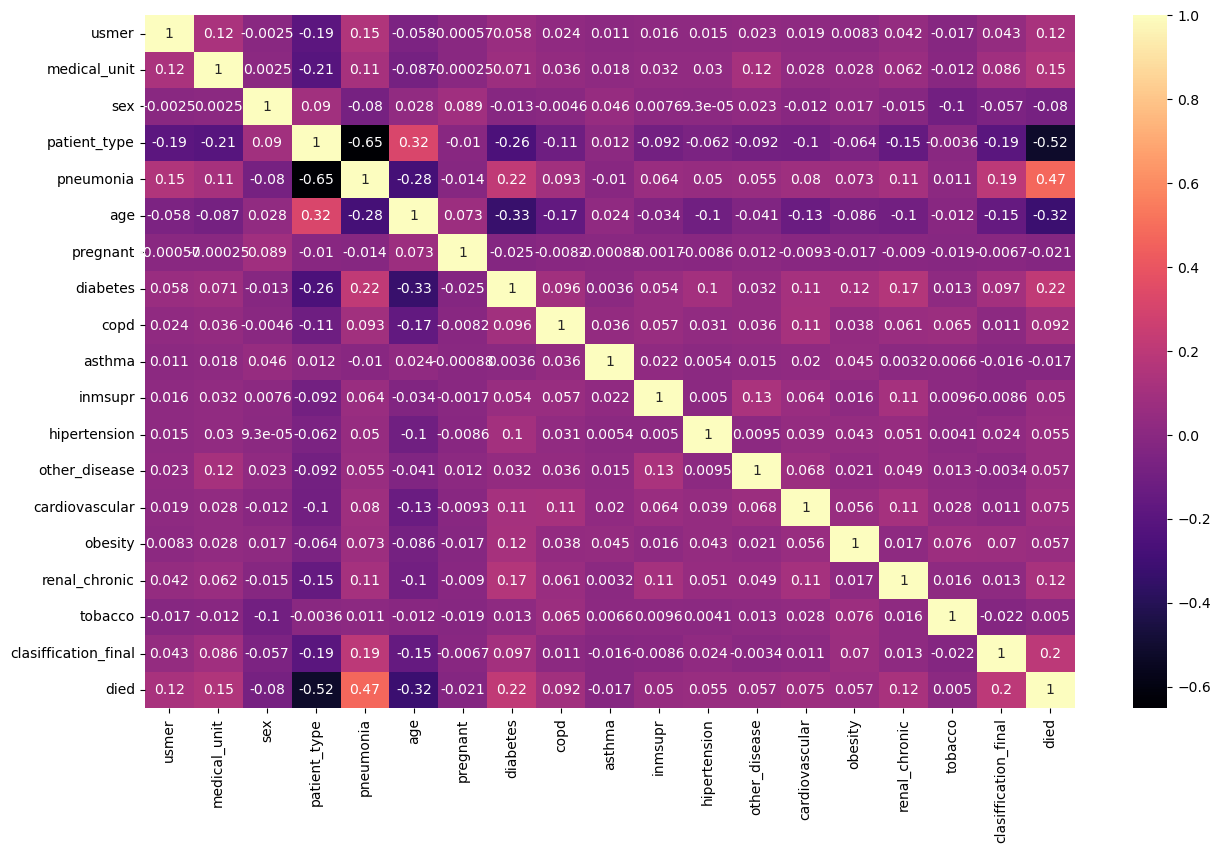

In [25]:
plt.figure(figsize=(15, 9))
sn.heatmap(df_train.corr(), annot=True, cmap='magma');

In [26]:
# ExtraTrees, que criará várias árvores de decisão
# Este algoritmo está pronto para ser utilizado 
# sendo que precisamos apenas indicar sua função
# Como estamos trabalhando em um problema de classificação utilizaremos a função “ExtraTreesClassifier()”.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [ ]:
# Separei as principais Variaveis que influenciam no modelo

In [48]:
x = x_train[['patient_type', 'pneumonia', 'diabetes', 'age', 'tobacco', 'renal_chronic']]
y = y_train

In [49]:
treeClf = DecisionTreeClassifier().fit(x, y)

In [50]:
# predict

pred_clf = treeClf.predict(x_test[['patient_type', 'pneumonia', 'diabetes', 'age', 'tobacco', 'renal_chronic']])

In [51]:
accuracy = accuracy_score(y_test, pred_clf)*100
precision_score = precision_score(y_test, pred_clf)*100
recall_score = recall_score(y_test, pred_clf)*100

TypeError: 'numpy.float64' object is not callable

In [36]:
models = pd.DataFrame({
    'Model': ['Acurácia', 'Precisão', 
              'Recall Score'],
    'Score': [accuracy, precision_score, 
              recall_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Acurácia,93.264720
1,Precisão,55.515576
2,Recall Score,37.825766


### Agora vamos treinar uma Árvore de Decisão nos dados de treino
* Comece com uma primeira versão definindo apenas o parâmetro max_depth = 3
* Dica: Não é preciso reescalonar as variáveis numéricas porque estamos usando uma Decision Tree.

In [38]:
model_decisiontree = ExtraTreesClassifier()

model_decisiontree.fit(x,y)

acc_decisiontree = round(model_decisiontree.score(x,y)*100,2)

acc_decisiontree

93.39

In [39]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [40]:
explainer_model_decisiontree = shap.TreeExplainer(treeClf)
shap_test_model_decisiontree = explainer_model_decisiontree.shap_values(x)

In [41]:
shap.force_plot(explainer_model_decisiontree.expected_value[1], shap_test_model_decisiontree[1][0,:], x.iloc[0,:])

In [42]:
explainer_decisiontree = shap.TreeExplainer(model_decisiontree)
shap_model_decisiontree = explainer_model_decisiontree.shap_values(x)

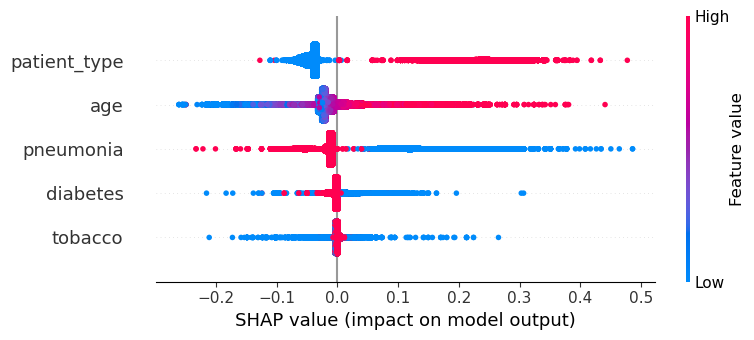

In [43]:
shap.summary_plot(shap_model_decisiontree[0], x)